# Preamble and Review

In [1]:
%matplotlib notebook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load the data
fruits = pd.read_table("Data/fruit_data_with_colors.txt")

# Split the DataFrame in features (X) and labels (y)
feature_names_fruits = ["height", "width", "mass", "color_score"]
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits["fruit_label"]
target_names_fruits = ["apple", "mandarin", "orange", "lemon"]

# Keep only 2 feature for this particular analysis
X_fruits_2d = fruits[["height", "width"]]
y_fruits_2d = fruits["fruit_label"]

# Split the DataFrame into the test and train data
X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

# Create a min-max scaler and aplly to the train data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# We must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)

print(f"Accuracy of K-NN classifier on training set: \
{knn.score(X_train_scaled, y_train):.2f}")

print(f"Accuracy of K-NN classifier on test set: \
{knn.score(X_test_scaled, y_test):.2f}")

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)

print(f"Predicted fruit type for {example_fruit} is \
{target_names_fruits[knn.predict(example_fruit_scaled)[0]-1]}")

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for [[5.5, 2.2, 10, 0.7]] is mandarin


# Datasets

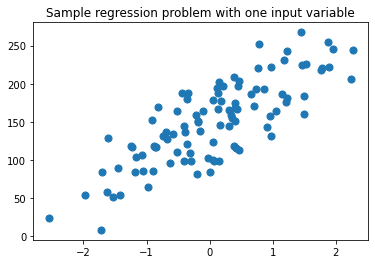

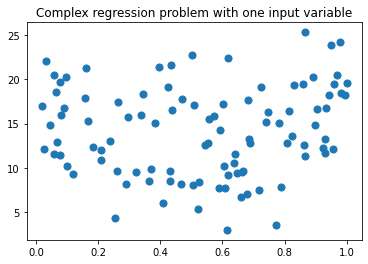

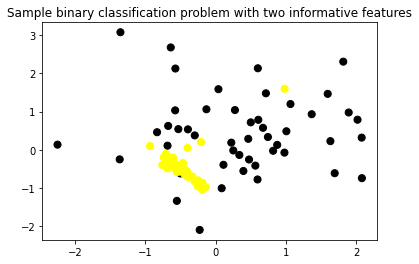

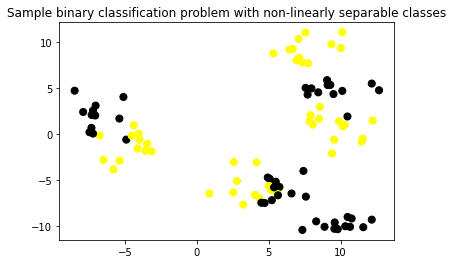

In [3]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(["#FFFF00", "#00FF00", "#0000FF", "#000000"])

# Synthetic dataset for simple regression
from sklearn.datasets import make_regression

plt.figure()
plt.title("Sample regression problem with one input variable")
X_R1, y_R1 = make_regression (n_samples = 100, n_features = 1,
                             n_informative = 1, bias = 150.0,
                             noise = 30, random_state = 0)

plt.scatter(X_R1, y_R1, marker="o", s=50)

# Synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1

plt.figure()
plt.title("Complex regression problem with one input variable")
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= "o", s=50)
plt.show()

# Synthetic dataset for classification (binary) 
plt.figure()
plt.title("Sample binary classification problem with two informative features")
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=6)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Communities and Crime dataset
# Communities and Crime dataset for regression
# https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

crime = pd.read_table("data/CommViolPredUnnormalizedData.txt", sep=",", na_values="?")
# remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
crime = crime.iloc[:,columns_to_keep].dropna()

X_crime = crime.iloc[:,range(0,88)]
y_crime = crime["ViolentCrimesPerPop"]

# More difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title("Sample binary classification problem with non-linearly separable classes")
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [4]:
from sklearn import neighbors
import matplotlib.patches as mpatches

def plot_two_class_knn_boundaries(X, y, n_neighbors, weights, X_test, y_test):
    X_mat = X
    y_mat = y

    # Create color maps
    cmap_light = ListedColormap(["#FFFFAA", "#AAFFAA", "#AAAAFF", "#EFEFEF"])
    cmap_bold  = ListedColormap(["#FFFF00", "#00FF00", "#0000FF", "#000000"])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # Step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, 
                cmap=cmap_bold, edgecolor = "black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    title = f"Neighbors = {n_neighbors}"
    if (X_test is not None):
        train_score = clf.score(X_mat, y_mat)
        test_score  = clf.score(X_test, y_test)
        title = title + f"\nTrain score = {train_score:.2f}, \
        Test score = {test_score:.2f}"

    patch0 = mpatches.Patch(color="#FFFF00", label="class 0")
    patch1 = mpatches.Patch(color="#000000", label="class 1")
    plt.legend(handles=[patch0, patch1])

    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.title(title)

    plt.show()


# K-Nearest Neighbors


## Classification

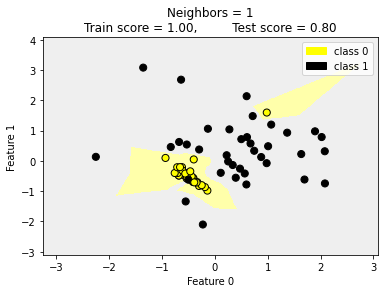

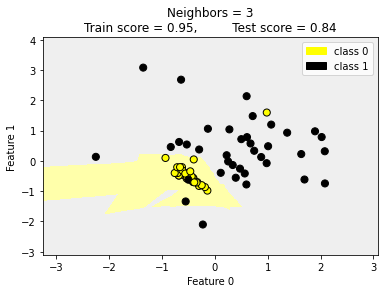

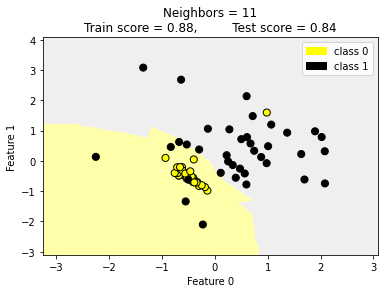

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

plot_two_class_knn_boundaries(X_train, y_train, 1, "uniform", X_test, y_test)
plot_two_class_knn_boundaries(X_train, y_train, 3, "uniform", X_test, y_test)
plot_two_class_knn_boundaries(X_train, y_train, 11, "uniform", X_test, y_test)

## Regression


In [6]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print("R-squared test score: {:.3f}"
     .format(knnreg.score(X_test, y_test)))

[231.70974697 148.35572605 150.58852659 150.58852659  72.14859259
 166.50590948 141.90634426 235.57098756 208.25897836 102.10462746
 191.31852674 134.50044902 228.32181403 148.35572605 159.16911306
 113.46875166 144.03646012 199.23189853 143.19242433 166.50590948
 231.70974697 208.25897836 128.01545355 123.14247619 141.90634426]
R-squared test score: 0.425


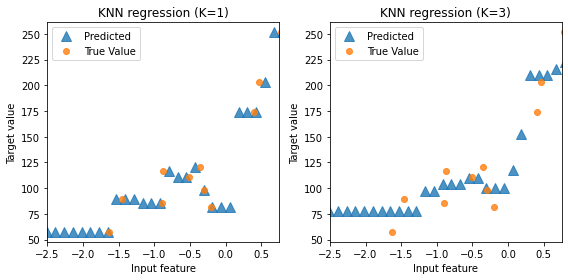

In [7]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

## Regression model complexity as a function of K

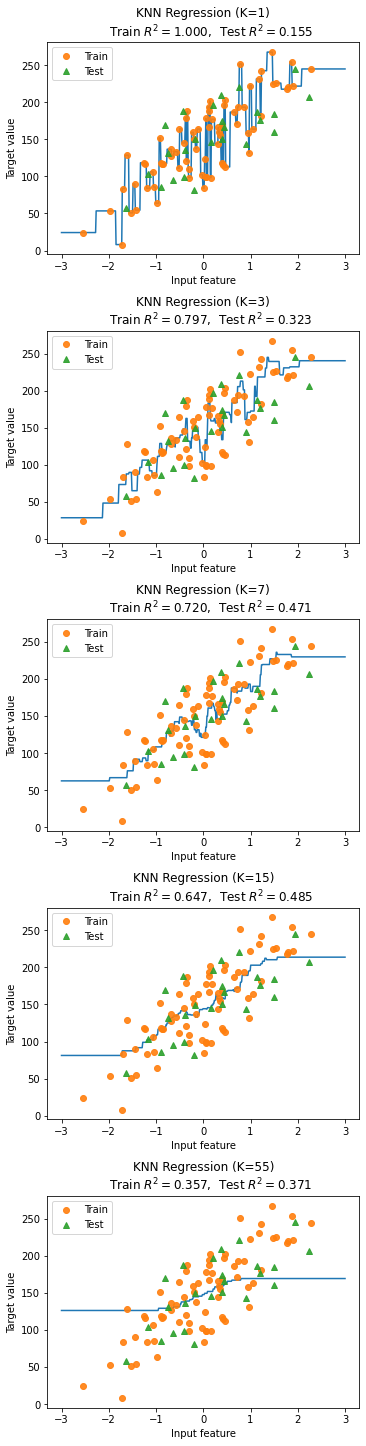

In [8]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
    Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

# Linear models for regression

## Linear regression

In [9]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

linReg = LinearRegression().fit(X_train, y_train)

print("Linear model intercept (b): {:.3f}".format(linReg.intercept_))

print("Linear model coefficient (w): {:.2f}".format(linReg.coef_[0]))

print("R-Squared score (training): {:.3f}".format(linReg.score(X_train, y_train)))

print("R-Squared score (test): {:.3f}".format(linReg.score(X_test, y_test)))

Linear model intercept (b): 148.446
Linear model coefficient (w): 45.71
R-Squared score (training): 0.679
R-Squared score (test): 0.492


## Linear regression: example plot

Text(0, 0.5, 'Target value (y)')

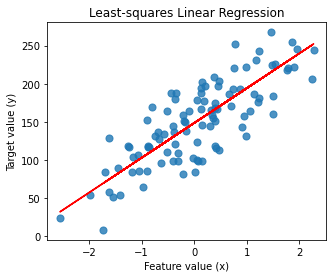

In [10]:
# Create new figure
plt.figure(figsize=(5,4))

# Scatter plot the X_R1 and y_R1 data
plt.scatter(X_R1, y_R1, marker= "o", s=50, alpha=0.8)

# Plot the linear regression
plt.plot(X_R1, linReg.coef_ * X_R1 + linReg.intercept_, "r")

# Set title and axis labels
plt.title("Least-squares Linear Regression")
plt.xlabel("Feature value (x)")
plt.ylabel("Target value (y)")

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: -1728.1306726021985
linear model coeff:
[ 1.61892346e-03 -9.43009110e+01  1.36067510e+01 -3.13380670e+01
 -8.15482721e-02 -1.69455128e+01 -2.42730375e-03  1.53013232e+00
 -1.39193248e-02 -7.72112833e+00  2.28112354e+01 -5.65708295e+00
  9.34751364e+00  2.06969566e-01 -7.43413626e+00  9.65856476e-03
  4.38030290e-03  4.79754625e-03 -4.46469212e+00 -1.60907140e+01
  8.82778012e+00 -5.06734503e-01 -1.42198055e+00  8.17551991e+00
 -3.87048268e+00 -3.54209213e+00  4.48758304e+00  9.30645715e+00
  1.73644996e+02  1.18220766e+01  1.51120836e+02 -3.29613007e+02
 -1.35343395e+02  6.95380108e-01 -2.38369008e+01  2.77038981e+00
  3.82248925e-01  4.38813358e+00 -1.06410851e+01 -4.92294176e-03
  4.14031827e+01 -1.16206866e-03  1.18568968e+00  1.75418465e+00
 -3.68283678e+00  1.59679443e+00 -8.42180230e+00 -3.79703897e+01
  4.74076990e+01 -2.50768374e+01 -2.88246410e-01 -3.65633234e+01
  1.89516080e+01 -4.53336736e+01  6.82698598e+02  1.04478671e+02
 -3.28575414

## Ridge regression



Ridge regression learns *w* and *b* using the same least-squares criterion but adds a penalty for large variations in *w* parameters.

Once the parameters are learned, the ridge regression **prediction** formula is the **same** as ordinary least-squares.

The addition of a parameter penalty is called **regularization**. Regularization prevents overfitting by resctricting the model, typically to reduce its complexity.

Ridge regression uses **L2 regularization**: minimize sum of squares of *w* entres.

The influence of the regularization term is controlled by the *$\alpha$* parameter.

Higher alpha means more regularization and simpler models.

In [12]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

linRidge = Ridge(alpha=20.0).fit(X_train, y_train)

print("Crime dataset")

print("Ridge regression linear model intercept: {}"
      .format(linRidge.intercept_))

print("Ridge regression linear model coeff: {}"
      .format(linRidge.coef_))

print("R-squared score (training): {:.3f}"
      .format(linRidge.score(X_train, y_train)))

print("R-squared score (test): {:.3f}"
      .format(linRidge.score(X_test, y_test)))

print("Number of non-zero features: {}"
      .format(np.sum(linRidge.coef_!=0)))

Crime dataset
Ridge regression linear model intercept: -3352.4230358463437
Ridge regression linear model coeff: [ 1.95091438e-03  2.19322667e+01  9.56286607e+00 -3.59178973e+01
  6.36465325e+00 -1.96885471e+01 -2.80715856e-03  1.66254486e+00
 -6.61426604e-03 -6.95450680e+00  1.71944731e+01 -5.62819154e+00
  8.83525114e+00  6.79085746e-01 -7.33614221e+00  6.70389803e-03
  9.78505502e-04  5.01202169e-03 -4.89870524e+00 -1.79270062e+01
  9.17572382e+00 -1.24454193e+00  1.21845360e+00  1.03233089e+01
 -3.78037278e+00 -3.73428973e+00  4.74595305e+00  8.42696855e+00
  3.09250005e+01  1.18644167e+01 -2.05183675e+00 -3.82210450e+01
  1.85081589e+01  1.52510829e+00 -2.20086608e+01  2.46283912e+00
  3.29328703e-01  4.02228467e+00 -1.12903533e+01 -4.69567413e-03
  4.27046505e+01 -1.22507167e-03  1.40795790e+00  9.35041855e-01
 -3.00464253e+00  1.12390514e+00 -1.82487653e+01 -1.54653407e+01
  2.41917002e+01 -1.32497562e+01 -4.20113118e-01 -3.59710660e+01
  1.29786751e+01 -2.80765995e+01  4.3851347

### Ridge regression with feature normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)
#
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linRidge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print("Crime dataset")

print("Ridge regression linear model intercept: {}"
      .format(linRidge.intercept_))

print("Ridge regression linear model coeff: {}"
      .format(linRidge.coef_))

print("R-squared score (training): {:.3f}"
      .format(linRidge.score(X_train_scaled, y_train)))

print("R-squared score (test): {:.3f}"
      .format(linRidge.score(X_test_scaled, y_test)))

print("Number of non-zero features: {}"
      .format(np.sum(linRidge.coef_!=0)))

Crime dataset
Ridge regression linear model intercept: 933.3906385044156
Ridge regression linear model coeff: [  88.68827454   16.48947987  -50.30285445  -82.90507574  -65.89507244
   -2.27674244   87.74108514  150.94862182   18.8802613   -31.05554992
  -43.13536109 -189.44266328   -4.52658099  107.97866804  -76.53358414
    2.86032762   34.95230077   90.13523036   52.46428263  -62.10898424
  115.01780357    2.66942023    6.94331369   -5.66646499 -101.55269144
  -36.9087526    -8.7053343    29.11999068  171.25963057   99.36919476
   75.06611841  123.63522539   95.24316483 -330.61044265 -442.30179004
 -284.49744001 -258.37150609   17.66431072 -101.70717151  110.64762887
  523.13611718   24.8208959     4.86533322  -30.46775619   -3.51753937
   50.57947231   10.84840601   18.27680946   44.11189865   58.33588176
   67.08698975  -57.93524659  116.1446052    53.81163718   49.01607711
   -7.62262031   55.14288543  -52.08878272  123.39291017   77.12562171
   45.49795317  184.91229771  -91.3572

### Ridge regression with regularization parameter: alpha

In [14]:
print("Ridge regression: effect of alpha regularization parameter\n")

for alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linRidge = Ridge(alpha).fit(X_train_scaled, y_train)
    r2_train = linRidge.score(X_train_scaled, y_train)
    r2_test = linRidge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linRidge.coef_ > 1.0))
    print("Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
    r-squared training: {:.2f}, r-squared test: {:.2f}\n"
          .format(alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 46,     r-squared training: 0.67, r-squared test: 0.50

Alpha = 1.00
num abs(coeff) > 1.0: 45,     r-squared training: 0.66, r-squared test: 0.56

Alpha = 10.00
num abs(coeff) > 1.0: 56,     r-squared training: 0.63, r-squared test: 0.59

Alpha = 20.00
num abs(coeff) > 1.0: 56,     r-squared training: 0.61, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 56,     r-squared training: 0.58, r-squared test: 0.58

Alpha = 100.00
num abs(coeff) > 1.0: 54,     r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000.00
num abs(coeff) > 1.0: 47,     r-squared training: 0.31, r-squared test: 0.30



## Lasso Regression

Lasso regression is another form of regularized linear regression that uses an L1 regularization penalty for training (instead of ridge's L2 penalty)

L1 penalty: Minimize the sum of the **absolute values** of the coefficients.

This has the effect of setting parameter weight in *w* to **zero** for the least influential variables. This is called a **sparse** solution: a kind of feature selection.

The parameter $\alpha$ constrols amount of L1 regularization (default = 1.0).

The prediction formula is the same as ordinary least-squares.

When to use ridge vs lasso regression:

    Many small/medium sized effects: use ridge.
    Onle few variables with medium/large effect: use lasso.

In [15]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linLasso = Lasso(alpha=2.0, max_iter=10000).fit(X_train_scaled, y_train)

print("Crime dataset")

print(f"Lasso regression linear model intercept: \
{linLasso.intercept_} \n")

print(f"Lasso regression linear model coeff: \n\n\
{linLasso.coef_} \n")

print(f"Non-zero features: {np.sum(linLasso.coef_ != 0)}\n")

print(f"R-squared score (training): \
{linLasso.score(X_train_scaled, y_train):.3f} \n")

print(f"R-squared score (test): \
{linLasso.score(X_test_scaled, y_test):.3f} \n")

print("Features with non-zero weight (sorted by absolute magnitude):\n")

for e in sorted (list(zip(list(X_crime), linLasso.coef_)), key = lambda e: -abs(e[1])): 
    if e[1] != 0:
        print(f"\t{e[0]}, {e[1]:.3f}")

Crime dataset
Lasso regression linear model intercept: 1186.6120619985786 

Lasso regression linear model coeff: 

[    0.             0.            -0.          -168.18346054
    -0.            -0.             0.           119.6938194
     0.            -0.             0.          -169.67564456
    -0.             0.            -0.             0.
     0.             0.            -0.            -0.
     0.            -0.             0.             0.
   -57.52991966    -0.            -0.             0.
   259.32889226    -0.             0.             0.
     0.            -0.         -1188.7396867     -0.
    -0.            -0.          -231.42347299     0.
  1488.36512229     0.            -0.            -0.
    -0.             0.             0.             0.
     0.             0.            -0.             0.
    20.14419415     0.             0.             0.
     0.             0.           339.04468804     0.
     0.           459.53799903    -0.             0.
   122.6922182

### Lasso regression with regularization parameter: alpha

In [16]:
print("Lasso regression: effect of the alpha regularization parameter on\n\
number of features kept in final model\n")

for alpha in [0.5, 1, 2, 3, 4, 5, 10, 20, 50]:
    linLasso = Lasso(alpha, max_iter=10000).fit(X_train_scaled, y_train)
    r2_train = linLasso.score(X_train_scaled, y_train)
    r2_test = linLasso.score(X_test_scaled, y_test)
    
    print(f"Alpha = {alpha:.2f}\nFeatures kept: {np.sum(linLasso.coef_ != 0)},\
    r-squared training: {r2_train:.2f}, r-squared test: {r2_test:.2f}\n")

Lasso regression: effect of the alpha regularization parameter on
number of features kept in final model

Alpha = 0.50
Features kept: 35,    r-squared training: 0.65, r-squared test: 0.58

Alpha = 1.00
Features kept: 25,    r-squared training: 0.64, r-squared test: 0.60

Alpha = 2.00
Features kept: 20,    r-squared training: 0.63, r-squared test: 0.62

Alpha = 3.00
Features kept: 17,    r-squared training: 0.62, r-squared test: 0.63

Alpha = 4.00
Features kept: 14,    r-squared training: 0.61, r-squared test: 0.62

Alpha = 5.00
Features kept: 12,    r-squared training: 0.60, r-squared test: 0.61

Alpha = 10.00
Features kept: 6,    r-squared training: 0.57, r-squared test: 0.58

Alpha = 20.00
Features kept: 2,    r-squared training: 0.51, r-squared test: 0.50

Alpha = 50.00
Features kept: 1,    r-squared training: 0.31, r-squared test: 0.30



## Polynomial regression

***

+ Generate new features consisting of all polynomial combinations of the original two features $(x_0, x_1)$.

+ The *degree* of the polynomial specifies how many variables participate at a time in each new feature.

+ This is still a weighted linear combination of features, so it's ***still a linear model***, and can use same least-squares estimation method for *w* and *b*.

***

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state=0)

linReg = LinearRegression().fit(X_train, y_train)

print(f"Linear model coeff (w): {linReg.coef_}")

print(f"Linear model intercept (b): {linReg.coef_}")

print(f"R-squared score (training): {linReg.score(X_train, y_train):.3f}")

print(f"R-squared score (test): {linReg.score(X_test, y_test):.3f}")

print("\nNow we transform the original input data to add polynomial\n\
features up to degree 2 (quadratic)\n")
polynomial = PolynomialFeatures(degree=2)
X_F1_polynomial = polynomial.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_polynomial, y_F1, random_state=0)

linReg = LinearRegression().fit(X_train, y_train)

print("(poly deg 2) Linear model coeff (w): {}"
      .format(linReg.coef_))

print("(poly deg 2) Linear model intercept (b): {}"
      .format(linReg.coef_))

print("(poly deg 2) R-squared score (training): {:.3f}"
      .format(linReg.score(X_train, y_train)))

print("(poly deg 2) R-squared score (test): {:.3f}"
      .format(linReg.score(X_test, y_test)))


print('\nAddition of many polynomial features often leads to overfitting,\n\
so we often use polynomial features in combination with regression that \n\
has a regularization penalty, like ridge regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_polynomial, y_F1, random_state = 0)

linReg = Ridge().fit(X_train, y_train)

print("(poly deg 2 + ridge) Linear model coeff (w): {}"
      .format(linReg.coef_))

print("(poly deg 2 + ridge) Linear model intercept (b): {}"
      .format(linReg.coef_))

print("(poly deg 2 + ridge) R-squared score (training): {:.3f}"
      .format(linReg.score(X_train, y_train)))

print("(poly deg 2 + ridge) R-squared score (test): {:.3f}"
      .format(linReg.score(X_test, y_test)))

Linear model coeff (w): [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]
Linear model intercept (b): [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]
R-squared score (training): 0.722
R-squared score (test): 0.722

Now we transform the original input data to add polynomial
features up to degree 2 (quadratic)

(poly deg 2) Linear model coeff (w): [ 3.40951018e-12  1.66452443e+01  2.67285381e+01 -2.21348316e+01
  1.24359227e+01  6.93086826e+00  1.04772675e+00  3.71352773e+00
 -1.33785505e+01 -5.73177185e+00  1.61813184e+00  3.66399592e+00
  5.04513181e+00 -1.45835979e+00  1.95156872e+00 -1.51297378e+01
  4.86762224e+00 -2.97084269e+00 -7.78370522e+00  5.14696078e+00
 -4.65479361e+00  1.84147395e+01 -2.22040650e+00  2.16572630e+00
 -1.27989481e+00  1.87946559e+00  1.52962716e-01  5.62073813e-01
 -8.91697516e-01 -2.18481128e+00  1.37595426e+00 -4.90336041e+00
 -2.23535458e+00  1.38268439e+00 -5.51908208e-01 -1.0879

# Linear models for classification

## Logistic regression

The logistic function transforms real-valued input to an output number $y$ between 0 and 1, interpreted as the **probability** the input object belongs to the positive class, given its input features $(x_0, x_1, ..., x_n)$

### Logistic regression for binary classification on fruits using height, width features (positive class: apple, negative class: others)

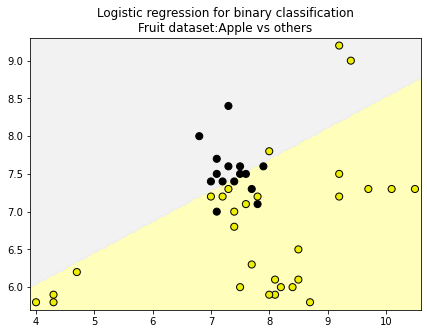

In [19]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

fig, subaxes = plt.subplots(1,1, figsize=(7,5))

# Make into a binary problem: apples vs everything else
y_fruits_apple = y_fruits_2d == 1
X_train, X_test, y_train, y_test = (
train_test_split(
    X_fruits_2d.values, 
    y_fruits_apple.values, 
    random_state=0))

s_title = "Logistic regression for binary classification\n\
Fruit dataset:Apple vs others"

clf = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, 
                                          s_title, subaxes)